Vector embeddings are a technique used in natural language processing (NLP) to represent words or phrases in a continuous vector space. Here is a quick explanation:

– Each word is assigned a vector (array of numeric values) that represents the word in an abstract vector space.

– Words that are semantically similar end up close together in the vector space, allowing vectors to encode meaning based on context.

– Embeddings are generated using neural networks trained on large amounts of text data. The network learns to assign vectors to words that optimize the prediction task it is trying to solve.

– Word2vec and GloVe are two popular embedding techniques. Word2vec uses a shallow neural network to learn the vectors. GloVe uses matrix factorization methods.

– The resulting word vectors capture syntactic and semantic information. Vector arithmetic can be used to add and subtract meanings. For example, vector(“King”) – vector(“Man”) + vector(“Woman”) results in a vector close to the embedding for Queen.

– Embeddings allow words with similar meanings to have similar vector representations. This allows models to understand analogies and generalize patterns in language better.

– Vector dimensions are in the range of 50-1000. Higher dimensionality captures more information but is less computationally efficient.

– Embeddings are used as the first layer in many NLP deep learning models like LSTM, Transformers, etc. This provides a dense vector input representation instead of sparse one-hot encodings.

These algorithms are fast and can generate language sequences and other downstream tasks with high accuracy, including contextual understanding, semantic and syntactic properties, as well as the linear relationship between words.



By leveraging embeddings, machine learning models gain a deeper understanding of the data, leading to more accurate and insightful outcomes. Whether it’s capturing the nuances in language for NLP tasks or identifying patterns in user behavior, embeddings provide a way to process complex data with greater efficacy and sophistication.

How Do Embeddings Work?
Representation: In the context of NLP, each unique word in a language is represented as a dense vector in a continuous vector space. These vectors are usually of a fixed size (like 100, 300, or 512 dimensions) regardless of the size of the vocabulary.
Contextual Meaning: Unlike one-hot encoding, which gives a sparse and non-informative representation (where each word is just a different index in a long vector), embeddings capture more information about words. Words with similar meanings or used in similar contexts tend to be closer together in the embedding space. For instance, “king” and “queen” might be represented by vectors that are close to each other.
Training: Embeddings can be pre-trained on large text corpora (like news articles, Wikipedia, or web pages) using algorithms like Word2Vec, GloVe, or more advanced methods like BERT (for contextual embeddings). The model learns to place words with similar meanings close together in this high-dimensional space.
Dimensionality Reduction: This representation allows for dimensionality reduction. Instead of dealing with thousands or millions of unique words, the model deals with vectors in a much smaller dimensional space.
Usage in Models: These vector representations can then be fed into various machine learning models (like neural networks) for tasks like sentiment analysis, machine translation, or content recommendation.
Beyond Words: The concept of embeddings extends beyond words to include things like sentences, paragraphs, user IDs, products, etc., where similar items are represented by close vectors in the embedding space.
Why it is usefull:

Efficiency: They provide a compact, dense representation.
Semantic Meaning: They capture deeper semantic meanings of words or items.
Flexibility: Can be used in various machine learning tasks.
Transfer Learning: Pre-trained embeddings can be used to boost performance in tasks with limited data.

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a widely used dimensionality reduction technique for visualizing high-dimensional data. While t-SNE is primarily used for visualization, it can also be used to generate embeddings. The process involves applying t-SNE to reduce the dimensionality of the data and obtaining a lower-dimensional embedding that captures the inherent structure of the original high-dimensional data.

UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique commonly used for generating embeddings. Unlike traditional methods like PCA or t-SNE, UMAP focuses on preserving both local and global structure in the data while maintaining computational efficiency.

An embedding is an array of numbers (a vector) representing a piece of information, such as text, images, audio, video, etc. Together, these numbers capture semantics and other important features of the data. The immediate consequence of doing this is that semantically similar entities map close to each other while dissimilar entities map farther apart in the vector space. 

Embedding models create a vector representation of a piece of text. You can think of a vector as an array of numbers that captures the semantic meaning of the text. By representing the text in this way, you can perform mathematical operations that allow you to do things like search for other pieces of text that are most similar in meaning. These natural language search capabilities underpin many types of context retrieval, where we provide an LLM with the relevant data it needs to effectively respond to a query.

The Embeddings class is a class designed for interfacing with text embedding models. There are many different embedding model providers (OpenAI, Cohere, Hugging Face, etc) and local models, and this class is designed to provide a standard interface for all of them.

The base Embeddings class in LangChain provides two methods: one for embedding documents and one for embedding a query. The former takes as input multiple texts, while the latter takes a single text. The reason for having these as two separate methods is that some embedding providers have different embedding methods for documents (to be searched over) vs queries (the search query itself).

Caching
Embeddings can be stored or temporarily cached to avoid needing to recompute them.

Caching embeddings can be done using a CacheBackedEmbeddings. The cache backed embedder is a wrapper around an embedder that caches embeddings in a key-value store. The text is hashed and the hash is used as the key in the cache.

The main supported way to initialize a CacheBackedEmbeddings is from_bytes_store



First, let's see an example that uses the local file system for storing embeddings and uses FAISS vector store for retrieval.

Load the document, split it into chunks, embed each chunk and load it into the vector store.



In [ ]:
from langchain.embeddings import CacheBackedEmbeddings
%pip install --upgrade --quiet  langchain-openai faiss-cpu
from langchain.storage import LocalFileStore
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter

underlying_embeddings = OpenAIEmbeddings()

store = LocalFileStore("./cache/")

cached_embedder = CacheBackedEmbeddings.from_bytes_store(
    underlying_embeddings, store, namespace=underlying_embeddings.model
)

raw_documents = TextLoader("state_of_the_union.txt").load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
documents = text_splitter.split_documents(raw_documents)

# %%time
# db = FAISS.from_documents(documents, cached_embedder)

# CPU times: user 218 ms, sys: 29.7 ms, total: 248 ms
# Wall time: 1.02 s

# If we try to create the vector store again, it'll be much faster since it does not need to re-compute any embeddings.

# %%time
# db2 = FAISS.from_documents(documents, cached_embedder)

# CPU times: user 15.7 ms, sys: 2.22 ms, total: 18 ms
# Wall time: 17.2 ms

# And here are some of the embeddings that got created:

# list(store.yield_keys())[:5]

# ['text-embedding-ada-00217a6727d-8916-54eb-b196-ec9c9d6ca472',
#  'text-embedding-ada-0025fc0d904-bd80-52da-95c9-441015bfb438',
#  'text-embedding-ada-002e4ad20ef-dfaa-5916-9459-f90c6d8e8159',
#  'text-embedding-ada-002ed199159-c1cd-5597-9757-f80498e8f17b',
#  'text-embedding-ada-0021297d37a-2bc1-5e19-bf13-6c950f075062']

The Embeddings class is a class designed for interfacing with text embedding models. There are lots of embedding model providers (OpenAI, Cohere, Hugging Face, etc) - this class is designed to provide a standard interface for all of them.

Embeddings create a vector representation of a piece of text. This is useful because it means we can think about text in the vector space, and do things like semantic search where we look for pieces of text that are most similar in the vector space.

The base Embeddings class in LangChain provides two methods: one for embedding documents and one for embedding a query. The former, .embed_documents, takes as input multiple texts, while the latter, .embed_query, takes a single text. The reason for having these as two separate methods is that some embedding providers have different embedding methods for documents (to be searched over) vs queries (the search query itself). .embed_query will return a list of floats, whereas .embed_documents returns a list of lists of floats.

In [ ]:
# pip install langchain-openai python-dotenv
from dotenv import load_dotenv
from langchain_openai import OpenAIEmbeddings
import os
load_dotenv()
api_key = os.getenv("OPENAI_API")
embeddings_model = OpenAIEmbeddings(api_key="...")

# embed a list of strings, recovering a list of embeddings
embeddings = embeddings_model.embed_documents(
    [
        "Hi there!",
        "Oh, hello!",
        "What's your name?",
        "My friends call me World",
        "Hello World!"
    ]
)
len(embeddings), len(embeddings[0])
# Output: (5, 1536)

#Use .embed_query to embed a single piece of text (e.g., for the purpose of comparing to other embedded pieces of texts).
embedded_query = embeddings_model.embed_query("What was the name mentioned in the conversation?")
embedded_query[:5]
'''
Output:
[0.0053587136790156364,
 -0.0004999046213924885,
 0.038883671164512634,
 -0.003001077566295862,
 -0.00900818221271038]
'''



In [ ]:
# Hugging Face Embedding class.
%pip install --upgrade --quiet  langchain sentence_transformers
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
text = "This is a test document."
query_result = embeddings.embed_query(text)
query_result[:3]
doc_result = embeddings.embed_documents([text])

# embedding models via the Hugging Face Inference API, which does not require us to install sentence_transformers and download models locally.
import getpass
from langchain_community.embeddings import HuggingFaceInferenceAPIEmbeddings
inference_api_key = getpass.getpass("Enter your HF Inference API Key:\n\n")
embeddings = HuggingFaceInferenceAPIEmbeddings(
    api_key=inference_api_key, model_name="sentence-transformers/all-MiniLM-l6-v2"
)

query_result = embeddings.embed_query(text)
query_result[:3]

# generate embeddings locally via the Hugging Face Hub package, which requires us to install huggingface_hub
#!pip install huggingface_hub
from langchain_huggingface.embeddings import HuggingFaceEndpointEmbeddings
embeddings = HuggingFaceEndpointEmbeddings()
text = "This is a test document."
query_result = embeddings.embed_query(text)
query_result[:3]

Google's generative AI embeddings service using the GoogleGenerativeAIEmbeddings class, found in the langchain-google-genai package.

In [3]:
# %pip install --upgrade --quiet  langchain-google-genai
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("GOOGLE_GEN_API")
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=api_key)
vector = embeddings.embed_query("hello, world!")
vector[:5]
# output: [0.05636945, 0.0048285457, -0.0762591, -0.023642512, 0.05329321]
vectors = embeddings.embed_documents(
    [
        "Today is Monday",
        "Today is Tuesday",
        "Today is April Fools day",
    ]
)
len(vectors), len(vectors[0])

# Output: (3, 768)

(3, 768)

In [8]:
# Create a vector store with a sample text
from langchain_core.vectorstores import InMemoryVectorStore

text = ["LangChain is the framework for building context-aware reasoning applications.", 
        "We love Bangladesh",
        "Bangladesh is in South Asia on the Bay of Bengal.",
        "It is surrounded almost entirely by neighbouring India, and shares a small border with Myanmar to its southeast, though it lies very close to Nepal, Bhutan, and China. The country is divided into three regions.",
        "Most of the country is dominated by the fertile Ganges Delta, the largest river delta in the world.[49] The northwest and central parts of the country are formed by the Madhupur and the Barind plateaus.",
        "The northeast and southeast are home to evergreen hill ranges.",
        "Langchain Offers a number of librares"]

vectorstore = InMemoryVectorStore.from_texts(
    text,
    embedding=embeddings,
)

# Use the vectorstore as a retriever
retriever = vectorstore.as_retriever()

# Retrieve the most similar text
retrieved_documents = retriever.invoke("What is LangChain?")

# show the retrieved document's contents
print(retrieved_documents)
# retrieve the content
print(retrieved_documents[0].page_content)
# retrive the second relevant content
print(retrieved_documents[1].page_content)


[Document(id='7dd8d4df-0dcb-4ab5-b5b9-fb047be53ec8', metadata={}, page_content='LangChain is the framework for building context-aware reasoning applications.'), Document(id='55b634f5-362f-4ab5-806f-b57550742bd3', metadata={}, page_content='Langchain Offers a number of librares'), Document(id='0186e2a9-9fb8-4124-9cc4-5a520d88711b', metadata={}, page_content='We love Bangladesh'), Document(id='8f58b70d-27e0-43a4-ab4f-1d01ce77f13c', metadata={}, page_content='Most of the country is dominated by the fertile Ganges Delta, the largest river delta in the world.[49] The northwest and central parts of the country are formed by the Madhupur and the Barind plateaus.')]
LangChain is the framework for building context-aware reasoning applications.
Langchain Offers a number of librares


In [29]:
text = ["LangChain is the framework for building context-aware reasoning applications.", 
        "We love Bangladesh",
        "Bangladesh is in South Asia on the Bay of Bengal.",
        "It is surrounded almost entirely by neighbouring India, and shares a small border with Myanmar to its southeast, though it lies very close to Nepal, Bhutan, and China. The country is divided into three regions.",
        "Most of the country is dominated by the fertile Ganges Delta, the largest river delta in the world.[49] The northwest and central parts of the country are formed by the Madhupur and the Barind plateaus.",
        "The northeast and southeast are home to evergreen hill ranges.",
        "Langchain Offers a number of librares"]
label = ['langchain','country','country','country','country','country','langchain']

import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

doc_result = embeddings.embed_documents(text)
doc_result = np.array(doc_result)
print(doc_result.shape)
tsne = TSNE(perplexity=5)
tsne_results = tsne.fit_transform(doc_result)

df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['Class Name'] = label # Add labels column from df_train to df_tsne
df_tsne

(7, 768)


,TSNE1,TSNE2,Class Name
0,22.743429,-6.516947,langchain
1,0.282942,-36.763226,country
2,-12.009573,-19.077978,country
3,-36.839413,-23.293633,country
4,-31.211071,2.549280,country
5,-27.236628,-48.470047,country
6,30.322594,-27.642157,langchain


In [12]:
len(doc_result), len(doc_result[0])

(7, 768)

(np.float64(-40.197513008117674),
 np.float64(33.680694007873534),
 np.float64(-51.02101335525513),
 np.float64(5.100246524810791))

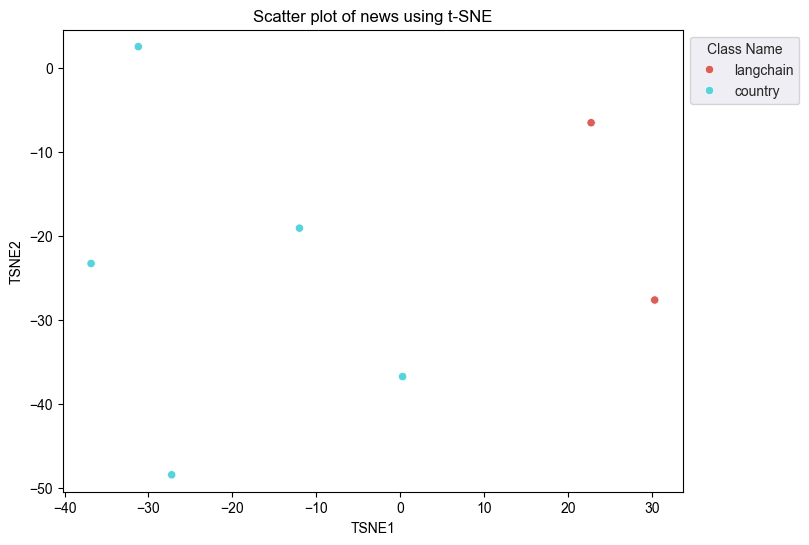

In [30]:
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Class Name', palette='hls')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Scatter plot of news using t-SNE');
plt.xlabel('TSNE1');
plt.ylabel('TSNE2');
plt.axis('equal')